This notebook will be dedicated to training and testing several ML models

In [1]:
from src import data_utils, preprocessing
import matplotlib.pyplot as plt
import numpy as np

Only run the cell below by removing the # symbol if you haven't downloaded the zones data

In [2]:
# run this cell to download the required data files containing the trip and zones information

# data_utils.download_zones_data('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip')

In [3]:
# first we get our cleaned data set
df_og = data_utils.clean_trip_data('yellow_tripdata_2022-05.parquet')

In [4]:
df_og.head(3).T

,0,1,2
PULocationID,246,238,163
DOLocationID,151,74,260
fare_amount,17.0,11.0,15.5
improvement_surcharge,0.3,0.3,0.3
congestion_surcharge,2.5,2.5,2.5
airport_fee,0.0,0.0,0.0
travel_time,1122.0,829.0,922.0
time_of_day,night,night,night
day,1,1,1
month,5,5,5


In [5]:
# now we get our X, and ys
X, y_travel_time, y_fare_amount = data_utils.get_feature_target(df_og)

In [6]:
# and we then get our training and testing sets
# we are going to get two sets of y labels, one for travel_time and another for fare_amount
X_train, X_test, y_train_travel_time, y_test_travel_time, y_train_fare_amount, y_test_fare_amount = data_utils.get_train_test_sets(X, y_travel_time, y_fare_amount)

In [7]:
X_train.shape

(2601035, 10)

In [8]:
# we can further split the training set into training and validation
X_train, X_val, y_train_travel_time, y_val_travel_time, y_train_fare_amount, y_val_fare_amount = data_utils.get_train_test_sets(X_train, y_train_travel_time, y_train_fare_amount)

In [9]:
X_train.shape

(2080828, 10)

In [10]:
# now using the training, validation, and testing sets we can preprocess our data
X_train, X_val, X_test = preprocessing.preprocess_data(X_train, X_val, X_test)

Input train data shape:  (2080828, 10)
Input val data shape:  (520207, 10)
Input test data shape:  (650259, 10) 



In [11]:
X_train.shape

(2080828, 12)

In [12]:
column_names_order = ['PULocationID','DOLocationID','improvement_surcharge','congestion_surcharge','airport_fee','day','month','is_weekend','distance_between_zones','morning','afternoon','night']

**Initial Results with no finetuning**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [14]:
# initial run without choosing any new hyperparameters
fare_amount_rf = RandomForestRegressor()

First we will start with RandomForest to predict fare amount

In [15]:
# our initial approach with no fine tuning
fare_amount_rf.fit(X_train,y_train_fare_amount)

RandomForestRegressor()

In [16]:
preds_fare = fare_amount_rf.predict(X_val)

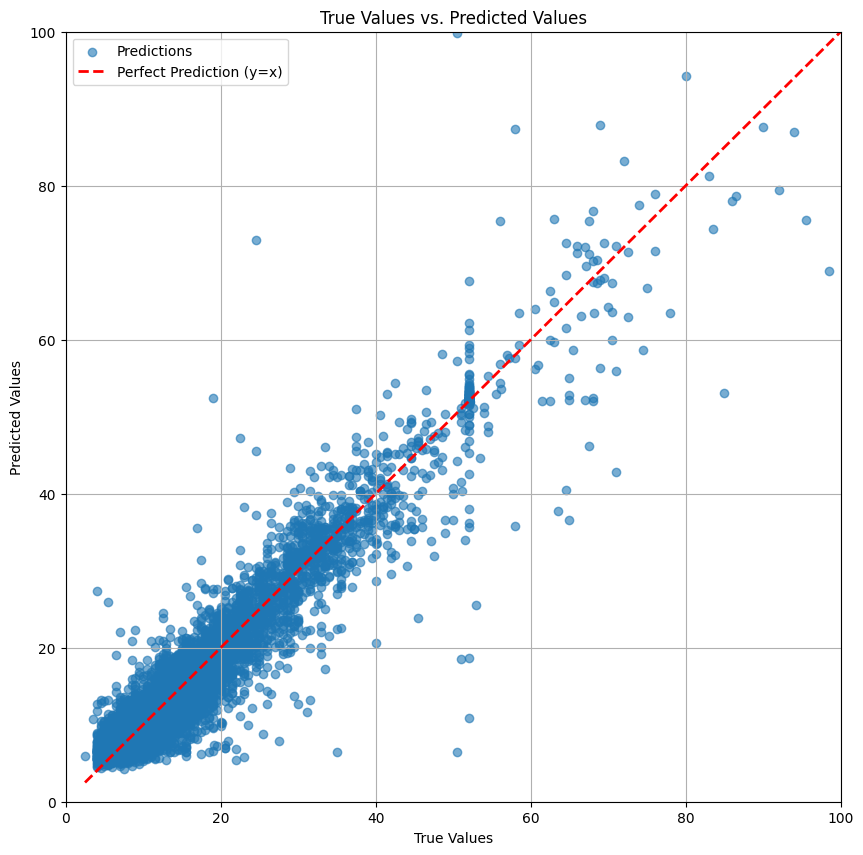

In [17]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_fare_amount[:10000], preds_fare[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,100])
plt.ylim([0,100])
#plotting perfect line
min_val = min(np.min(y_val_fare_amount), np.min(preds_fare))
max_val = max(np.max(y_val_fare_amount), np.max(preds_fare))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.show()

In [18]:
# measure our results
r2_fare = r2_score(y_val_fare_amount, preds_fare)
mae = mean_absolute_error(y_val_fare_amount, preds_fare)
rmse = root_mean_squared_error(y_val_fare_amount, preds_fare)
# agregar r2
print(f'R2 score: {r2_fare}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.9003879751199806
Mean Absolute Error: 2.0117602234056076
Root Mean Squared Error: 3.9090481803025403


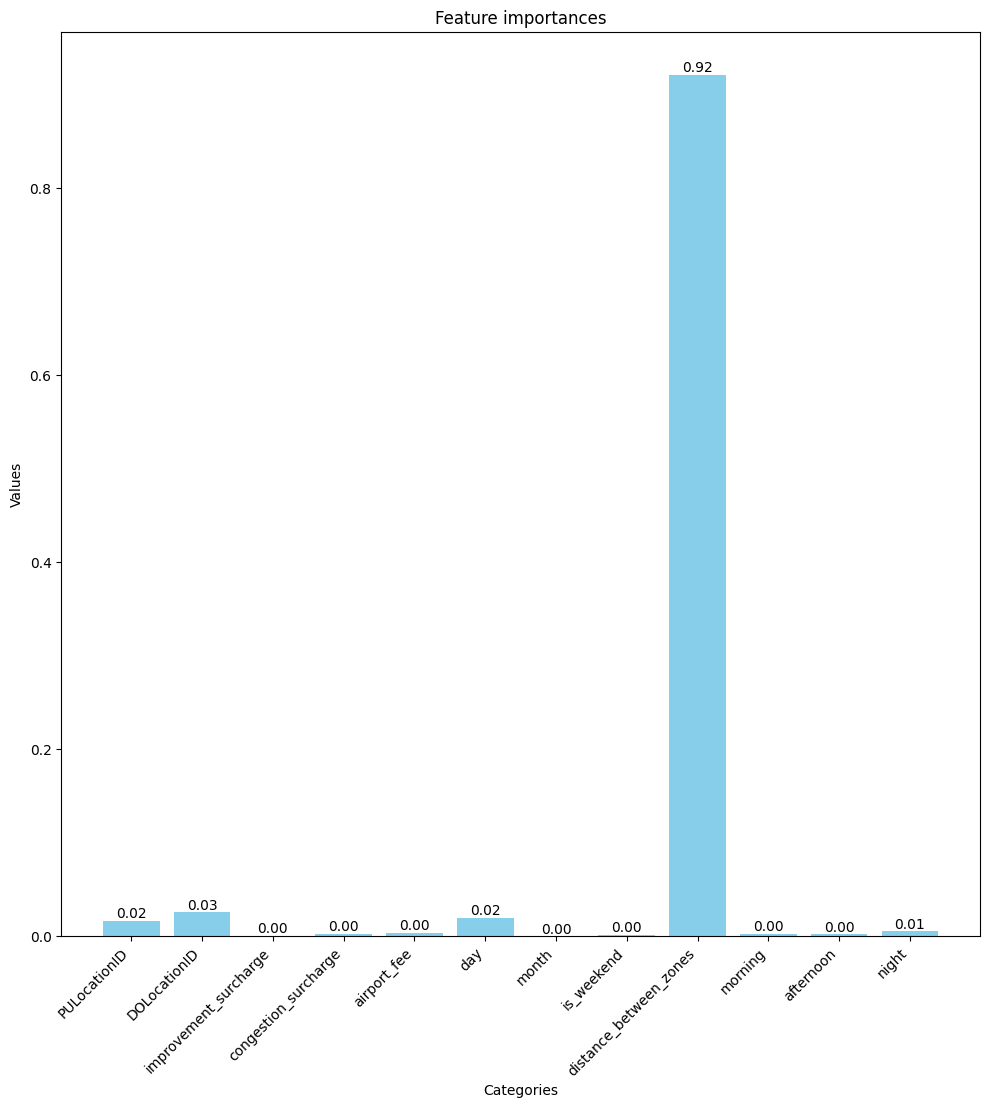

In [38]:
# Feature importances when predicting the fare amount
# bar chart
plt.figure(figsize=(10,10))
fare_bars = plt.bar(column_names_order,fare_amount_rf.feature_importances_,color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importances")
# so everything fits and is readable
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
# to add values on top of each bar
for bar in fare_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of bar)
                yval,                             # y position (top of bar)
                f'{yval:.2f}',                    # Text label (format value)
                va='bottom',                      # Vertical alignment (above bar)
                ha='center') 


plt.show()

Now to predict the travel time

In [20]:
# initial run, no funetuning
travel_time_rf = RandomForestRegressor()

In [21]:
travel_time_rf.fit(X_train, y_train_travel_time)

RandomForestRegressor()

In [22]:
preds_tt = travel_time_rf.predict(X_val)

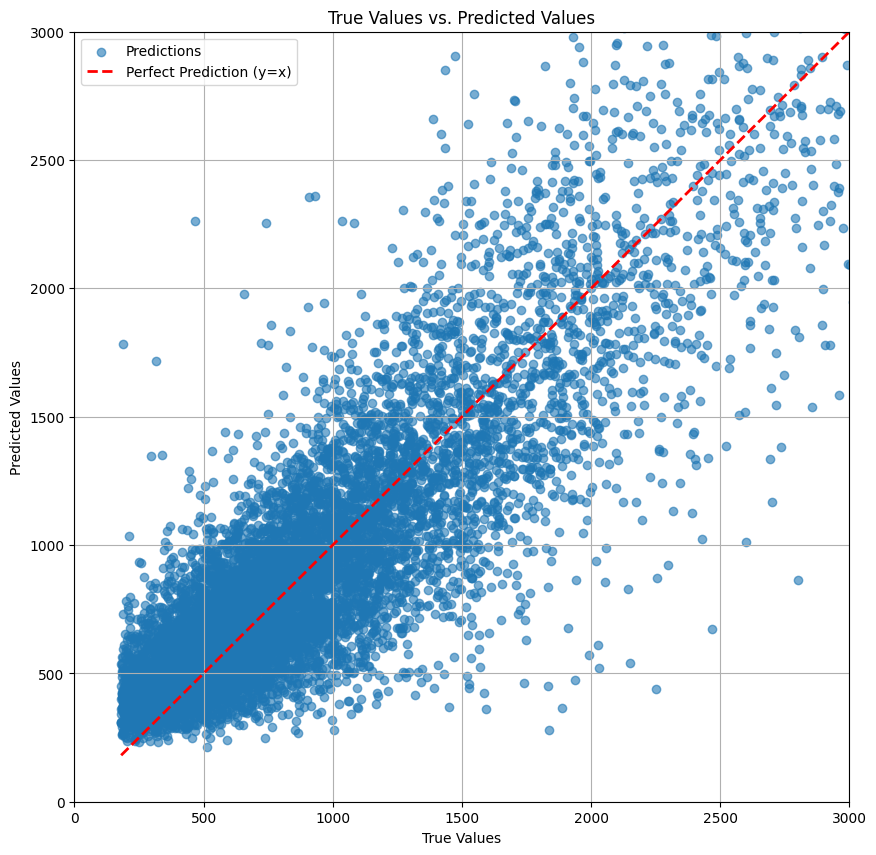

In [23]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_travel_time[:10000], preds_tt[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,3000])
plt.ylim([0,3000])
#plotting perfect line
min_val = min(np.min(y_val_travel_time), np.min(preds_tt))
max_val = max(np.max(y_val_travel_time), np.max(preds_tt))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# measure our results
r2_tt = r2_score(y_val_travel_time, preds_tt)
mae = mean_absolute_error(y_val_travel_time, preds_tt)
rmse = root_mean_squared_error(y_val_travel_time, preds_tt)
# agregar r2
print(f'R2 score: {r2_tt}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.7762841152276896
Mean Absolute Error: 236.66135122886706
Root Mean Squared Error: 376.9181057334572


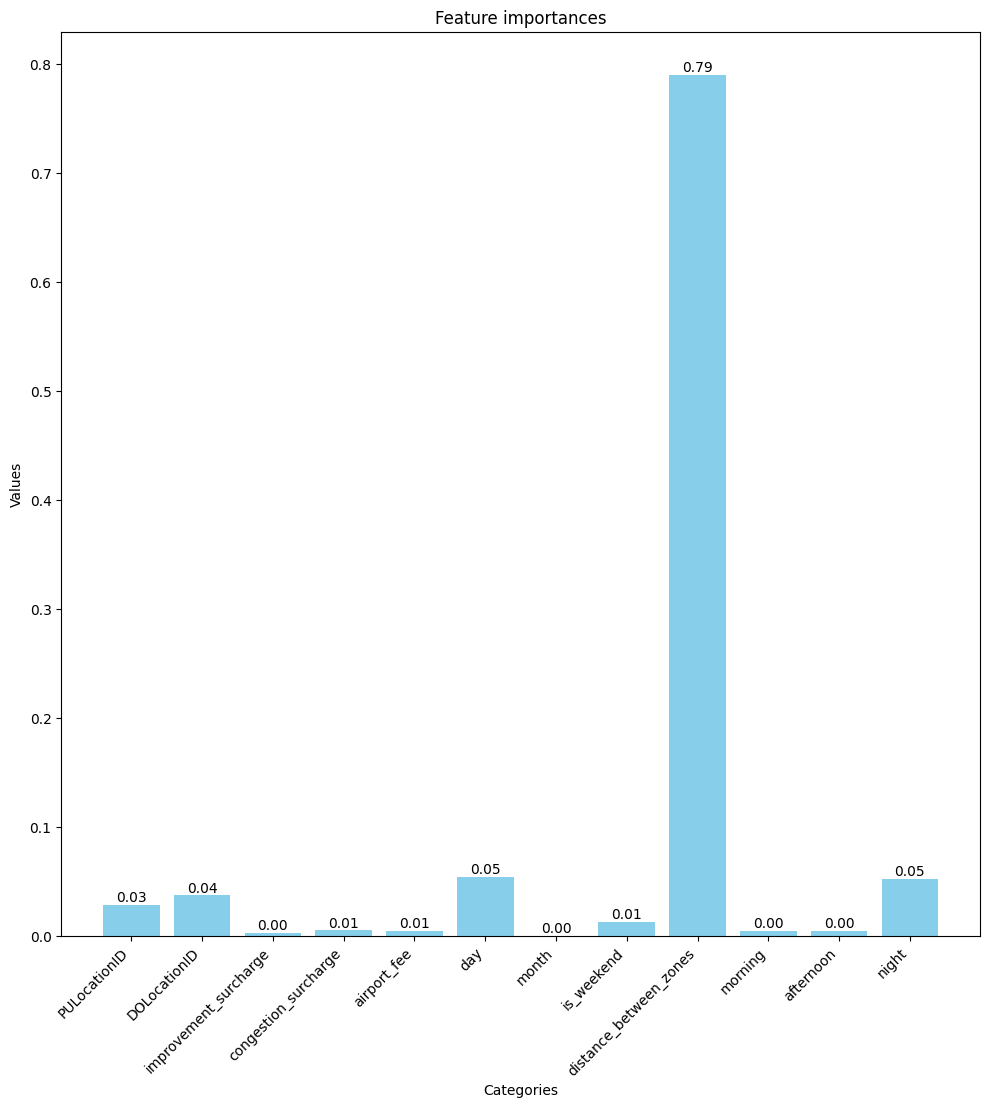

In [39]:
# Now showing the feature importances
# set size
plt.figure(figsize=(10,10))
# get bars to plot (names,values)
travel_bars = plt.bar(column_names_order,travel_time_rf.feature_importances_,color='skyblue')
# set some general parameters
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importances")
# tight layout so everything fits
plt.tight_layout()
# rotate the name of the columns so we are able to read them more easily
plt.xticks(rotation=45, ha='right')
# for each bar, we get the height and add the value on top of it
for bar in travel_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of bar)
                yval,                             # y position (top of bar)
                f'{yval:.2f}',                    # Text label (format value)
                va='bottom',                      # Vertical alignment (above bar)
                ha='center') 


plt.show()

**Now we start finetuning our RandomForest models**

Since our training dataset is fairly large (around 2M rows), it would not be time efficient to try to do a RandomizedSearch using the complete dataset, since this would takeup too much time.

Instead, we will first create a subsample of this training dataset that is much smaller, and use that to perform RandomizedSearch with a wide range of parameters to more efficiently check for the best ranges.
Once we have narrowed down our ranges a bit, we can then use those new updated ranges to perform RandomizedSearch on the complete training dataset that contains 2M rows

In [46]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [47]:
X_train.shape

(2160964, 12)

In [80]:
y_train_tt = y_train_fare_amount.reset_index(drop=True)

In [81]:
# create a much smaller subsample from our X_train dataset
n_samples = 70000
rand_idx = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

X_subsample = X_train[rand_idx]
y_subsample = y_train_tt[rand_idx]
print(X_subsample.shape)
print(y_subsample.shape)

(70000, 12)
(70000,)


In [82]:
fare_amount_rf = RandomForestRegressor(n_jobs=-1, random_state=42)

In [83]:
# we will choose from the following parameters to perform our cross validation search
rf_params = {'n_estimators':[int(x) for x in np.linspace(start=100,stop=1000,num=10)], # 100,200,300...1000
             'max_features':['sqrt','log2',0.5,0.75,1.0],
             'max_depth':[int(x) for x in np.linspace(start=10,stop=50,num=5)], # 10,20...50
             'min_samples_split':[5,10,25,50,100],
             'min_samples_leaf':[3,5,10,20,50],
             }

In [84]:
n_iterations = 20

In [85]:
clf_fare_amount = RandomizedSearchCV(estimator=fare_amount_rf,
                                     param_distributions=rf_params,
                                     n_iter=n_iterations,
                                     cv=5,
                                     scoring='neg_mean_absolute_error',
                                     verbose=3,
                                     n_jobs=-1,
                                     random_state=42)

In [ ]:
clf_fare_amount.fit(X_subsample,y_subsample)